# Double 7's Portfolio (Short Term Trading Strategies that Work)

    1. The Security is above its 200-day moving average or X-day ma
    2. The Security closes at a 7-day low, buy.
    3. If the Security closes at a 7-day high, sell your long position.
    
    (For a Portfolio of securities.)

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
# Symbol Lists
SP500_Sectors = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
Mixed_Asset_Classes = ['IWB', 'SPY', 'VGK', 'IEV', 'EWJ', 'EPP', 'IEF', 'SHY', 'GLD']
FANG_Stocks = ['FB', 'AMZN', 'NFLX', 'GOOG']
Stocks_Bonds_Gold = ['SPY', 'QQQ', 'TLT', 'GLD']

# Pick one of the above
symbols = Stocks_Bonds_Gold

capital = 10000
start = datetime.datetime(*pf.ALPHA_BEGIN)
#start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()

In [4]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'stop_loss_pct' : 0.15,
    'margin' : 3.0,
    'period' : 7,
    'use_regime_filter' : True,
    'use_vola_weight' : True
}

Run Strategy

In [5]:
s = strategy.Strategy(symbols, capital, start, end, options=options)
s.run()

STOP LOSS!!!
STOP LOSS!!!


View log DataFrames: raw trade log, trade log, and daily balance

In [6]:
s.rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2005-09-07,0,93.60,93,entry,LONG,TLT
1,2005-09-14,1,123.21,63,entry,LONG,SPY
2,2005-09-14,2,39.18,195,entry,LONG,QQQ
3,2005-09-29,3,122.66,63,exit,LONG,SPY
4,2005-09-29,4,39.20,195,exit,LONG,QQQ


In [7]:
s.tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
619,2023-06-07,180.15,2023-07-07,178.64,-1.51,-847.11,561,113434.80,LONG,GLD
620,2023-06-23,433.21,2023-06-29,438.11,4.90,1229.90,251,114664.70,LONG,SPY
621,2023-06-26,357.68,2023-06-30,369.42,11.74,2195.38,187,116860.09,LONG,QQQ
622,2023-07-21,375.63,2023-07-28,383.48,7.85,1342.35,171,118202.44,LONG,QQQ
623,2023-07-24,181.40,2023-07-28,181.86,0.46,310.96,676,118513.40,LONG,GLD


In [8]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2023-07-24,126962.69,126962.69,126962.69,847,-59999.04,1.47,O
2023-07-25,128081.50,128081.50,128081.50,847,-59999.04,1.47,-
2023-07-26,128467.68,128467.68,128467.68,847,-59999.04,1.47,-
2023-07-27,126366.90,126366.90,126366.90,847,-59999.04,1.47,-
2023-07-28,128513.40,128513.40,128513.40,0,128513.40,1.00,X


Generate strategy stats - display all available stats

In [9]:
pf.print_full(s.stats)

start                                                    2005-09-02
end                                                      2023-07-28
beginning_balance                                             10000
ending_balance                                            128513.40
total_net_profit                                          118513.40
gross_profit                                              266984.82
gross_loss                                               -148471.41
profit_factor                                                  1.80
return_on_initial_capital                                   1185.13
annual_return_rate                                            15.33
trading_period                           17 years 10 months 26 days
pct_time_in_market                                            65.04
margin                                                         3.00
avg_leverage                                                   1.26
max_leverage                                    

View Performance by Symbol

,cumul_total,weight,pct_cumul_total,relative_performance
GLD,"$11,041.93",0.25,0.09,0.37
SPY,"$36,686.52",0.25,0.31,1.24
QQQ,"$44,870.20",0.25,0.38,1.51
TLT,"$25,914.75",0.25,0.22,0.87
TOTAL,"$118,513.40",1.00,1.00,1.00


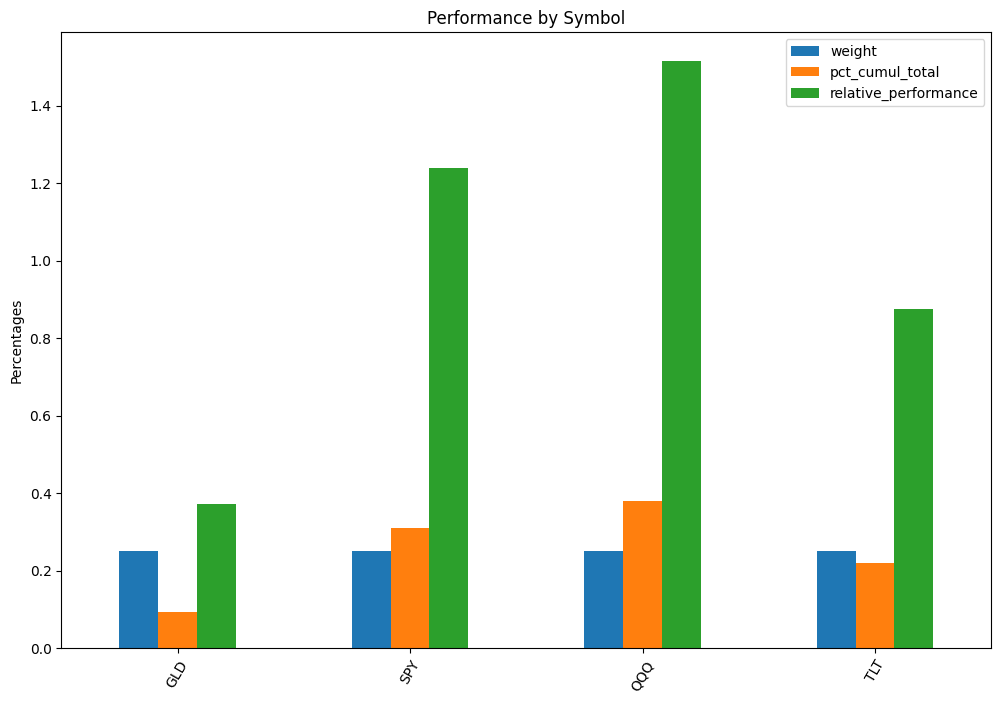

In [10]:
weights = {symbol: 1 / len(symbols) for symbol in symbols}
totals = s.portfolio.performance_per_symbol(weights=weights)
totals

,GLD,SPY,QQQ,TLT
GLD,1.00,0.05,0.04,0.16
SPY,0.05,1.00,0.92,-0.36
QQQ,0.04,0.92,1.00,-0.30
TLT,0.16,-0.36,-0.30,1.00


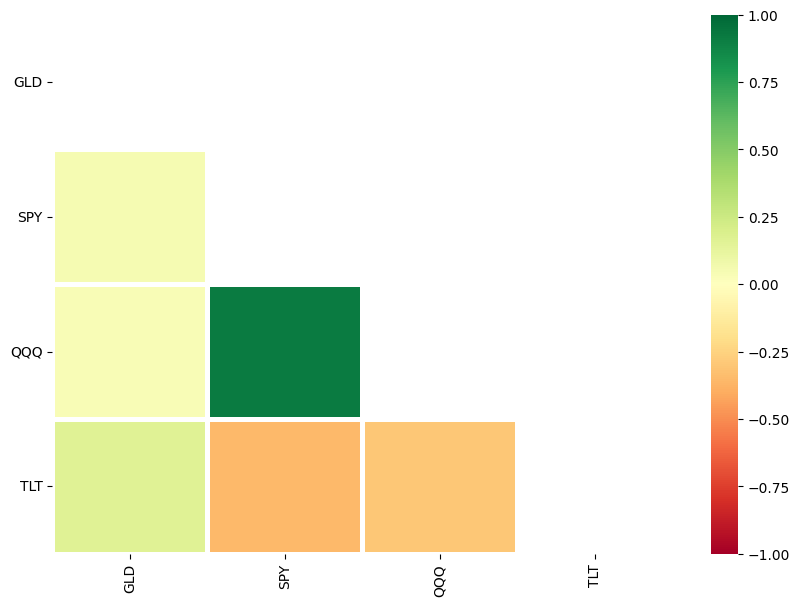

In [11]:
corr_df = s.portfolio.correlation_map(s.ts)
corr_df

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [12]:
benchmark = pf.Benchmark('SPY', s.capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

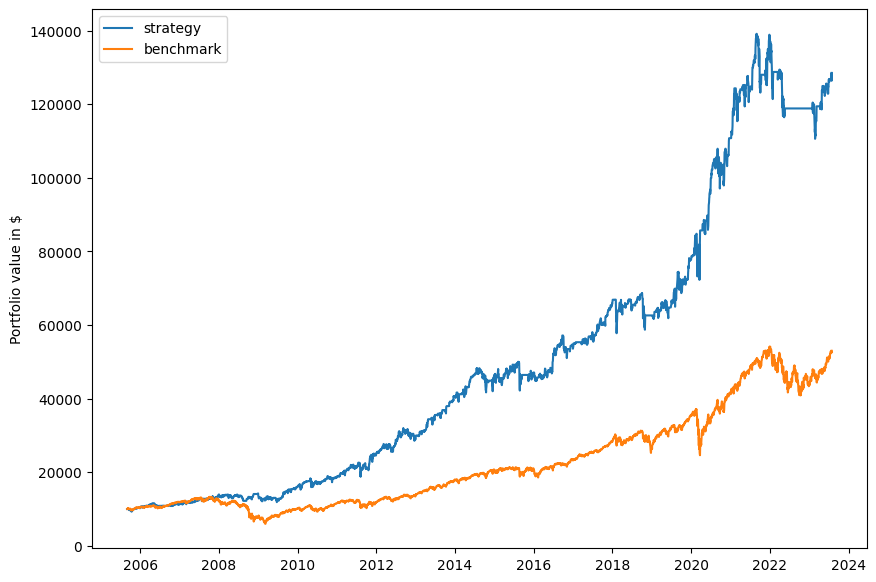

In [13]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,15.33,9.76
max_closed_out_drawdown,-20.52,-55.03
annualized_return_over_max_drawdown,0.75,0.18
best_month,20.92,23.61
worst_month,-14.76,-30.98
sharpe_ratio,0.90,0.57
sortino_ratio,0.98,0.70
monthly_std,3.81,4.64
annual_std,14.83,16.82


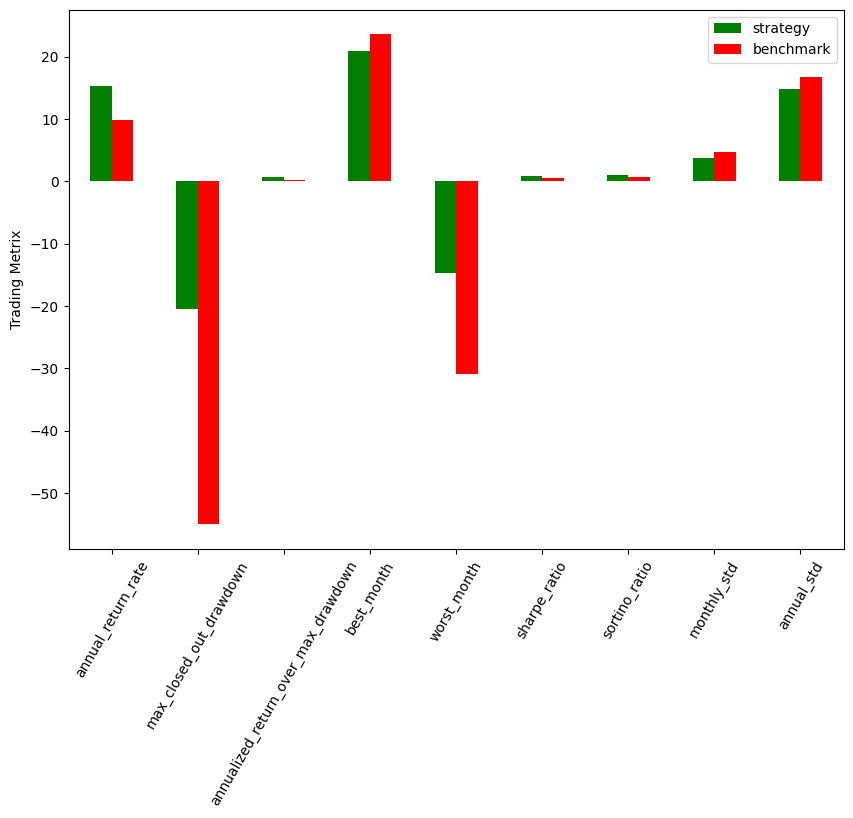

In [14]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Analysis: Kelly Criterian

In [15]:
kelly = pf.kelly_criterion(s.stats, benchmark.stats)
kelly

sharpe_ratio            0.90
sharpe_ratio_max        0.96
sharpe_ratio_min        0.85
strategy risk           0.15
instrument risk         0.17
optimal target risk     0.90
half kelly criterion    0.45
aggressive leverage     5.36
moderate leverage       2.68
conservative leverage   2.52
dtype: float64